In [52]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df_case = pd.read_csv("C:\\Users\\tzo13\\OneDrive\\Escritorio\\COVID19\\DS4C COVID19 in South Korea\\Case.csv")

df_info_paciente = pd.read_csv("C:\\Users\\tzo13\\OneDrive\\Escritorio\\COVID19\\DS4C COVID19 in South Korea\\PatientInfo2.csv")

df_ruta_paciente = pd.read_csv("C:\\Users\\tzo13\\OneDrive\\Escritorio\\COVID19\\DS4C COVID19 in South Korea\\PatientRoute.csv")
df_region = pd.read_csv("C:\\Users\\tzo13\\OneDrive\\Escritorio\\COVID19\\DS4C COVID19 in South Korea\\Region.csv")
df_searchtrend = pd.read_csv("C:\\Users\\tzo13\\OneDrive\\Escritorio\\COVID19\\DS4C COVID19 in South Korea\\SearchTrend.csv")
df_floating = pd.read_csv("C:\\Users\\tzo13\\OneDrive\\Escritorio\\COVID19\\DS4C COVID19 in South Korea\\SeoulFloating.csv")
df_time = pd.read_csv("C:\\Users\\tzo13\\OneDrive\\Escritorio\\COVID19\\DS4C COVID19 in South Korea\\Time.csv")
df_timeage = pd.read_csv("C:\\Users\\tzo13\\OneDrive\\Escritorio\\COVID19\\DS4C COVID19 in South Korea\\TimeAge.csv")
df_timegender = pd.read_csv("C:\\Users\\tzo13\\OneDrive\\Escritorio\\COVID19\\DS4C COVID19 in South Korea\\TimeGender.csv")
df_timepovince = pd.read_csv("C:\\Users\\tzo13\\OneDrive\\Escritorio\\COVID19\\DS4C COVID19 in South Korea\\TimeProvince.csv")
df_weather = pd.read_csv("C:\\Users\\tzo13\\OneDrive\\Escritorio\\COVID19\\DS4C COVID19 in South Korea\\Weather.csv")

In [76]:
percentiles=[0.1,0.25,0.5,0.75,0.90,0.95,0.975,0.99,0.995,0.999]
atipicos_sup = 0.99
atipicos_inf = 0.01

# Dataset Case

El dataset case contiene información sobre casos confirmados según:
1. Proincia
2. Ciudad 
3. Indicador si la infección fue grupal
4. Caso de infección 
5. Casos confirmados 
6. Latitud 
7. Longitud


### EDA

In [3]:
df_case.head()

,case_id,province,city,group,infection_case,confirmed,latitude,longitude
0,1000001,Seoul,Guro-gu,True,Guro-gu Call Center,79,37.508163,126.884387
1,1000002,Seoul,Dongdaemun-gu,True,Dongan Church,24,37.592888,127.056766
2,1000003,Seoul,Eunpyeong-gu,True,Eunpyeong St. Mary's Hospital,14,37.63369,126.9165
3,1000004,Seoul,Seongdong-gu,True,Seongdong-gu APT,13,37.55713,127.0403
4,1000005,Seoul,Jongno-gu,True,Jongno Community Center,10,37.57681,127.006


In [4]:
df_case.isnull().sum()

case_id           0
province          0
city              0
group             0
infection_case    0
confirmed         0
latitude          0
longitude         0
dtype: int64

In [5]:
df_case.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 8 columns):
case_id           81 non-null int64
province          81 non-null object
city              81 non-null object
group             81 non-null bool
infection_case    81 non-null object
confirmed         81 non-null int64
latitude          81 non-null object
longitude         81 non-null object
dtypes: bool(1), int64(2), object(5)
memory usage: 4.6+ KB


In [6]:
df_case.groupby('province').size().sort_values(ascending = False)

province
Gyeongsangbuk-do     9
Seoul                8
Gyeongsangnam-do     7
Gyeonggi-do          7
Busan                7
Incheon              5
Jeollabuk-do         4
Jeollanam-do         4
Sejong               4
Gwangju              4
Daejeon              4
Daegu                4
Chungcheongbuk-do    4
Gangwon-do           3
Chungcheongnam-do    3
Ulsan                3
Jeju-do              1
dtype: int64

In [7]:
confirmados_provincia = df_case.groupby('province').agg({'confirmed': np.sum})
confirmados_provincia.sort_values(by = 'confirmed', ascending = False)

,confirmed
province,
Daegu,6066
Gyeongsangbuk-do,1145
Seoul,218
Gyeonggi-do,164
Chungcheongnam-do,115
Busan,91
Gyeongsangnam-do,85
Sejong,40
Chungcheongbuk-do,31


# Dataset Pacientes

El dataset de información de los paciente contiene perfil e información clínica relevante. Contiene los siguientes campos:
1. ID paciente
2. Número global de infección
3. Sexo
4. Año de nacimiento
5. Edad
6. País
7. Provincia
8. Ciudad
9. Enfermedad previa?
10. Caso de infección
11. Orden de infección con respecto al resto en la XXXX
12. Infectado por (ID del paciente que infectó)
13. Número de personas contactadas
14. Fecha de síntomas
15. Fecha de confirmación
16. Fecha de recuperación
17. Fecha de muerte
18. Estado final (cuarentena, recuperado, fallecido)

In [8]:
df_info_paciente.head()

,patient_id,global_num,sex,birth_year,age,country,province,city,disease,infection_case,infection_order,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
0,1000000001,2.0,male,1964.0,50s,Korea,Seoul,Gangseo-gu,NaN,overseas inflow,1.0,NaN,75.0,1/22/2020,1/23/2020,2/5/2020,NaN,released
1,1000000002,5.0,male,1987.0,30s,Korea,Seoul,Jungnang-gu,NaN,overseas inflow,1.0,NaN,31.0,NaN,1/30/2020,3/2/2020,NaN,released
2,1000000003,6.0,male,1964.0,50s,Korea,Seoul,Jongno-gu,NaN,contact with patient,2.0,2.002000e+09,17.0,NaN,1/30/2020,2/19/2020,NaN,released
3,1000000004,7.0,male,1991.0,20s,Korea,Seoul,Mapo-gu,NaN,overseas inflow,1.0,NaN,9.0,1/26/2020,1/30/2020,2/15/2020,NaN,released
4,1000000005,9.0,female,1992.0,20s,Korea,Seoul,Seongbuk-gu,NaN,contact with patient,2.0,1.000000e+09,2.0,NaN,1/31/2020,2/24/2020,NaN,released


In [9]:
#General information about the dataset
df_info_paciente.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2243 entries, 0 to 2242
Data columns (total 18 columns):
patient_id            2243 non-null int64
global_num            1337 non-null float64
sex                   2147 non-null object
birth_year            1789 non-null float64
age                   1985 non-null object
country               2243 non-null object
province              2243 non-null object
city                  2176 non-null object
disease               19 non-null object
infection_case        1193 non-null object
infection_order       42 non-null float64
infected_by           475 non-null float64
contact_number        413 non-null float64
symptom_onset_date    194 non-null object
confirmed_date        2098 non-null object
released_date         233 non-null object
deceased_date         30 non-null object
state                 2147 non-null object
dtypes: float64(5), int64(1), object(12)
memory usage: 315.5+ KB


In [10]:
df_info_paciente.isna().sum()

patient_id               0
global_num             906
sex                     96
birth_year             454
age                    258
country                  0
province                 0
city                    67
disease               2224
infection_case        1050
infection_order       2201
infected_by           1768
contact_number        1830
symptom_onset_date    2049
confirmed_date         145
released_date         2010
deceased_date         2213
state                   96
dtype: int64

In [11]:
df_info_paciente['infected_by'] = df_info_paciente['infected_by'].fillna(0)
df_info_paciente['birth_year'] = df_info_paciente['birth_year'].fillna(0)
df_info_paciente['contact_number'] = df_info_paciente['contact_number'].fillna(0)

In [12]:
age = 2020 - df_info_paciente['birth_year']

In [13]:
#df_info_paciente.drop('age')
df_info_paciente['age'] = age

In [14]:
df_info_paciente['infected_by'].astype('int64')
df_info_paciente['infected_by'] = df_info_paciente['infected_by'].map(lambda val: val if val > 0 else np.nan)

In [15]:
df_info_paciente['birth_year'].astype('int64')
df_info_paciente['birth_year'] = df_info_paciente['birth_year'].map(lambda val: val if val > 0 else np.nan)

In [16]:
df_info_paciente['contact_number'].astype('int64')
df_info_paciente['contact_number'] = df_info_paciente['contact_number'].map(lambda val: val if val > 0 else np.nan)

In [17]:
df_info_paciente.head()

,patient_id,global_num,sex,birth_year,age,country,province,city,disease,infection_case,infection_order,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
0,1000000001,2.0,male,1964.0,56.0,Korea,Seoul,Gangseo-gu,NaN,overseas inflow,1.0,NaN,75.0,1/22/2020,1/23/2020,2/5/2020,NaN,released
1,1000000002,5.0,male,1987.0,33.0,Korea,Seoul,Jungnang-gu,NaN,overseas inflow,1.0,NaN,31.0,NaN,1/30/2020,3/2/2020,NaN,released
2,1000000003,6.0,male,1964.0,56.0,Korea,Seoul,Jongno-gu,NaN,contact with patient,2.0,2.002000e+09,17.0,NaN,1/30/2020,2/19/2020,NaN,released
3,1000000004,7.0,male,1991.0,29.0,Korea,Seoul,Mapo-gu,NaN,overseas inflow,1.0,NaN,9.0,1/26/2020,1/30/2020,2/15/2020,NaN,released
4,1000000005,9.0,female,1992.0,28.0,Korea,Seoul,Seongbuk-gu,NaN,contact with patient,2.0,1.000000e+09,2.0,NaN,1/31/2020,2/24/2020,NaN,released


In [18]:
pais_genero = df_info_paciente.groupby(['country', 'sex']).count().sort_values(by = 'patient_id',ascending = False)

In [19]:
pais_genero['patient_id']

country   sex   
Korea     female    1203
          male       932
China     female       6
          male         4
Mongolia  male         1
Thailand  female       1
Name: patient_id, dtype: int64

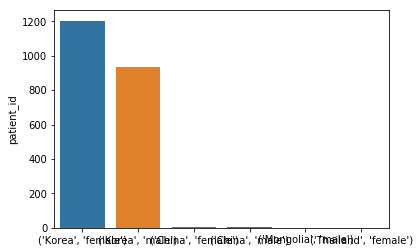

In [20]:
sns.barplot(x = pais_genero.index, y = 'patient_id', data = pais_genero)

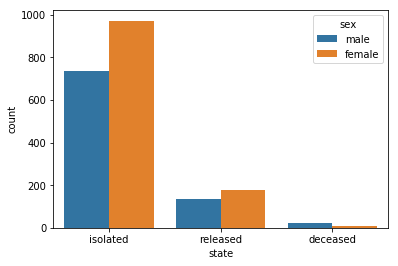

In [21]:
sns.countplot(x = 'state', hue = 'sex', order = ['isolated', 'released','deceased'], data = df_info_paciente)

In [22]:
df_por_estado = df_info_paciente.groupby('state').count().sort_values(by = 'patient_id', ascending = False)
df_por_estado.rename(columns = {'patient_id':'Total_patient'}, inplace = True)

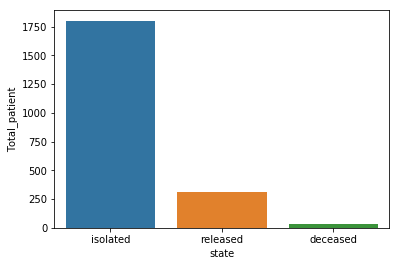

In [23]:
sns.barplot(x = df_por_estado.index , y = 'Total_patient', data = df_por_estado)

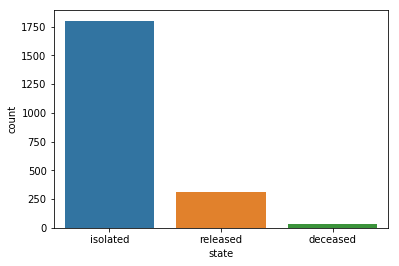

In [24]:
sns.countplot(x = 'state', order = ['isolated', 'released','deceased'] ,data = df_info_paciente)

In [25]:
#Date range from dataset
print ('Max datetime from confirmed_date: ' , df_info_paciente['confirmed_date'].max())
print ('Min datetime from confirmed_date: ' , df_info_paciente['confirmed_date'].min())

('Max datetime from confirmed_date: ', '3/9/2020')
('Min datetime from confirmed_date: ', inf)


In [26]:
df_info_paciente['released_date'] = pd.to_datetime(df_info_paciente['released_date'])
df_info_paciente['confirmed_date'] = pd.to_datetime(df_info_paciente['confirmed_date'])
df_info_paciente['deceased_date'] = pd.to_datetime(df_info_paciente['deceased_date'])
df_info_paciente['symptom_onset_date'] = pd.to_datetime(df_info_paciente['symptom_onset_date'])

In [27]:
df_info_paciente['confirmado_recuperado'] = df_info_paciente['released_date'] - df_info_paciente['confirmed_date']
df_info_paciente['primeros_sintomas_confirmada'] = df_info_paciente['confirmed_date'] - df_info_paciente['symptom_onset_date']
df_info_paciente['primeros_sintomas_fallecido'] = df_info_paciente['deceased_date'] - df_info_paciente['symptom_onset_date']

In [28]:
df_info_paciente.head()

,patient_id,global_num,sex,birth_year,age,country,province,city,disease,infection_case,...,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state,confirmado_recuperado,primeros_sintomas_confirmada,primeros_sintomas_fallecido
0,1000000001,2.0,male,1964.0,56.0,Korea,Seoul,Gangseo-gu,NaN,overseas inflow,...,NaN,75.0,2020-01-22,2020-01-23,2020-02-05,NaT,released,13 days,1 days,NaT
1,1000000002,5.0,male,1987.0,33.0,Korea,Seoul,Jungnang-gu,NaN,overseas inflow,...,NaN,31.0,NaT,2020-01-30,2020-03-02,NaT,released,32 days,NaT,NaT
2,1000000003,6.0,male,1964.0,56.0,Korea,Seoul,Jongno-gu,NaN,contact with patient,...,2.002000e+09,17.0,NaT,2020-01-30,2020-02-19,NaT,released,20 days,NaT,NaT
3,1000000004,7.0,male,1991.0,29.0,Korea,Seoul,Mapo-gu,NaN,overseas inflow,...,NaN,9.0,2020-01-26,2020-01-30,2020-02-15,NaT,released,16 days,4 days,NaT
4,1000000005,9.0,female,1992.0,28.0,Korea,Seoul,Seongbuk-gu,NaN,contact with patient,...,1.000000e+09,2.0,NaT,2020-01-31,2020-02-24,NaT,released,24 days,NaT,NaT


In [29]:
df_fechas_confirmados = df_info_paciente.groupby('confirmed_date').count().sort_values(by = 'patient_id', ascending = False)
df_fechas_confirmados.rename(columns = {'patient_id': 'Total_cases'}, inplace = True)
df_fechas_confirmados = df_fechas_confirmados.sort_values(by = 'confirmed_date', ascending = True)

In [30]:
df_fechas_confirmados.head()

,Total_cases,global_num,sex,birth_year,age,country,province,city,disease,infection_case,infection_order,infected_by,contact_number,symptom_onset_date,released_date,deceased_date,state,confirmado_recuperado,primeros_sintomas_confirmada,primeros_sintomas_fallecido
confirmed_date,,,,,,,,,,,,,,,,,,,,
2020-01-20,1,1,1,1,1,1,1,1,0,1,0,0,0,1,1,0,1,1,1,0
2020-01-23,1,1,1,1,1,1,1,1,0,1,1,0,1,1,1,0,1,1,1,0
2020-01-26,1,1,1,1,1,1,1,1,0,1,1,0,1,0,1,0,1,1,0,0
2020-01-27,1,1,1,1,1,1,1,1,0,1,1,0,1,0,1,0,1,1,0,0
2020-01-30,3,3,3,3,3,3,3,3,0,3,3,1,3,1,3,0,3,3,1,0


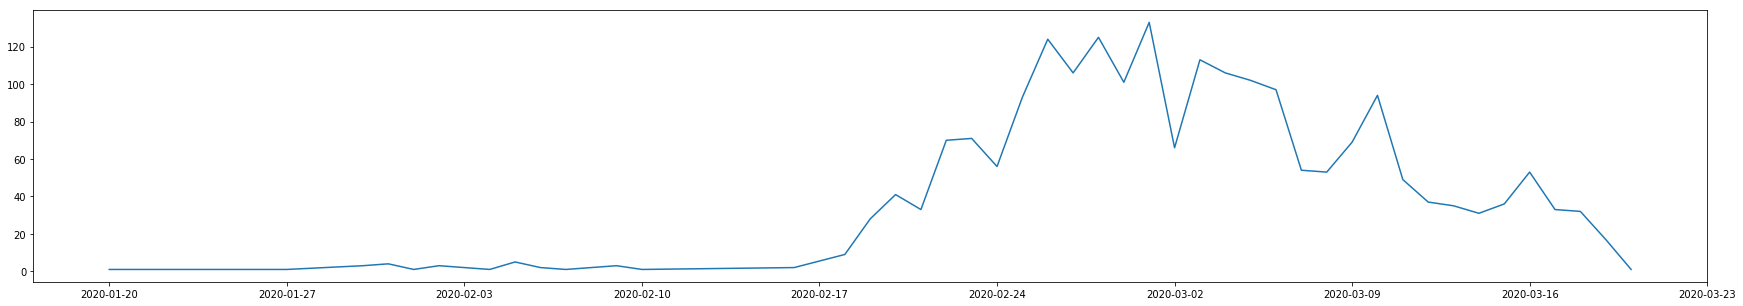

In [31]:
plt.figure(figsize = (30,5))
plt.plot(df_fechas_confirmados.index, df_fechas_confirmados['Total_cases'])

In [32]:
df_fechas_confirmados['Total_cases_acum'] = df_fechas_confirmados['Total_cases'].cumsum()

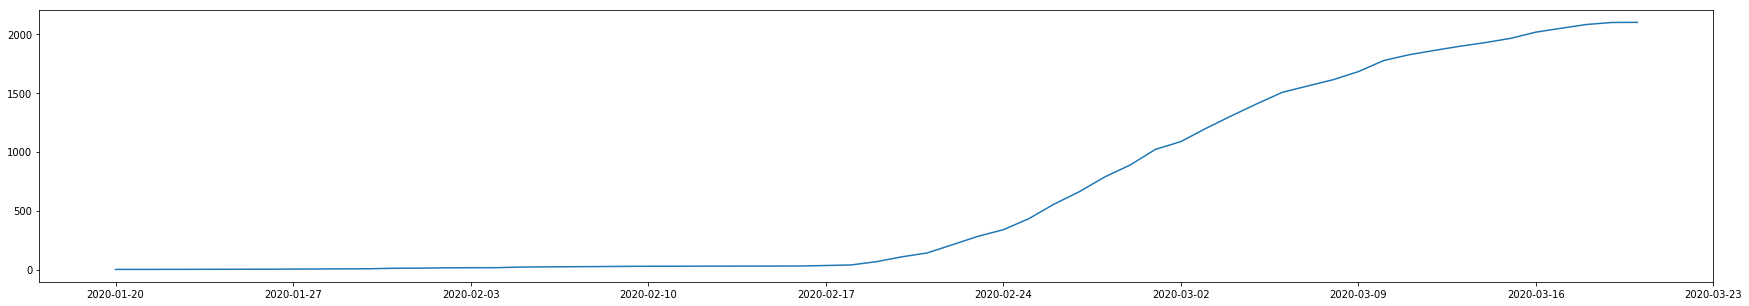

In [33]:
plt.figure(figsize = (30,5))
plt.plot(df_fechas_confirmados.index, df_fechas_confirmados['Total_cases_acum'])

In [34]:
#df_info_paciente.drop('age')
age = 2020 - df_info_paciente['birth_year']
df_info_paciente['age'] = age

In [35]:
print df_info_paciente['age'].max()
print df_info_paciente['age'].min()

104.0
0.0


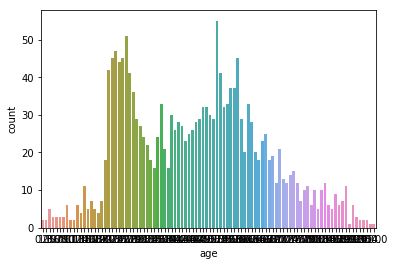

In [36]:
sns.countplot(x = 'age', data= df_info_paciente)

C:\ProgramData\Anaconda2\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


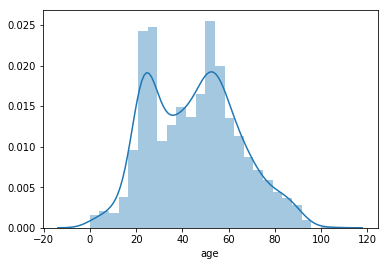

In [46]:
distribucion_edades = df_info_paciente['age'].dropna(0)
sns.distplot(distribucion_edades, 
             bins = 25)

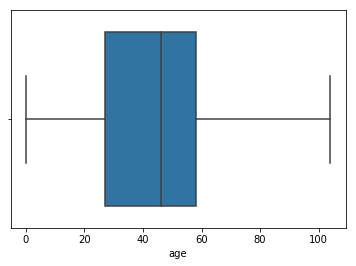

In [47]:
sns.boxplot(distribucion_edades)

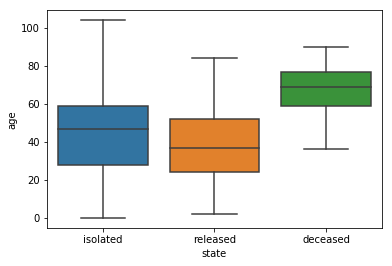

In [37]:
sns.boxplot(x = 'state', y = 'age', order = ['isolated', 'released', 'deceased'] ,data = df_info_paciente)

In [64]:
df_info_paciente.groupby('state').agg({'age': [np.min, np.mean, np.max]})

age                  
          amin       mean   amax
state                           
deceased  36.0  68.724138   90.0
isolated   0.0  45.821403  104.0
released   2.0  39.039007   84.0

In [77]:
test = df_info_paciente['age'].describe(percentiles)
test

count    1789.000000
mean       45.041364
std        19.394569
min         0.000000
10%        21.000000
25%        27.000000
50%        46.000000
75%        58.000000
90%        71.000000
95%        79.000000
97.5%      85.000000
99%        88.120000
99.5%      91.000000
99.9%      94.212000
max       104.000000
Name: age, dtype: float64

In [87]:
#df_info_paciente.head()
print df_info_paciente['confirmado_recuperado'].min()
print df_info_paciente['confirmado_recuperado'].mean()
print df_info_paciente['confirmado_recuperado'].max()

Timedelta('13 days 22:52:01.030042')